In [11]:
import pandas as pd
import os
import csv
import missingno as msno

covid_df = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")

covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [12]:
covid_df.count()

iso_code                              58980
continent                             58624
location                              59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions                   560
weekly_icu_admissions_per_millio

<AxesSubplot:>

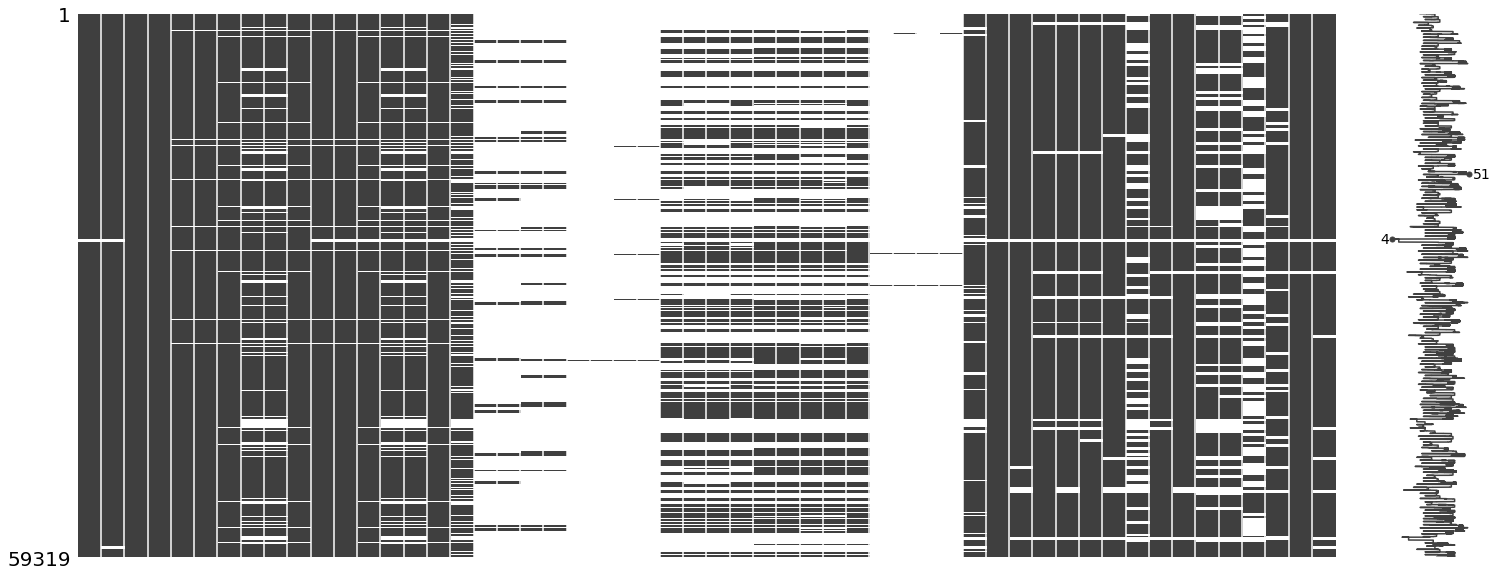

In [13]:
msno.matrix(covid_df)

In [14]:
covid_df.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,58980,58624,59319,59319,58772,58765,57810,50365,50364,57810,...,56462,38678,57054,57710,45051,44434,28558,52429,58677,56712
unique,191,6,192,377,28885,6992,14477,9973,1421,3456,...,183,75,184,136,108,124,95,100,178,158
top,ARG,Africa,Argentina,2020-11-30,1.0,0.0,0.0,1.0,0.0,0.0,...,18933.907,0.2,152.783,2.42,1.9,24.7,87.847,0.7,76.88,0.757
freq,376,16248,376,192,874,13613,4132,1784,21956,18144,...,376,4268,376,3901,1375,1235,376,2084,934,961


In [4]:
covid_df['continent'] = covid_df['continent'].astype(str)
covid_df['total_cases'] = pd.to_numeric(covid_df['total_cases'],errors='coerce')

In [5]:
first = covid_df.dropna(subset=['continent', 'total_cases'])

<AxesSubplot:xlabel='continent', ylabel='total_cases'>

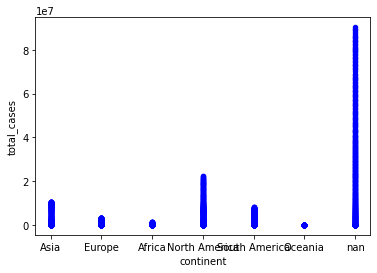

In [6]:
first.plot.scatter(x='continent',
                      y='total_cases', c='Blue')

In [7]:
covid_df['total_deaths'] = pd.to_numeric(covid_df['total_deaths'],errors='coerce')
covid_df['hospital_beds_per_thousand'] = pd.to_numeric(covid_df['hospital_beds_per_thousand'],errors='coerce')

In [8]:
second = covid_df.dropna(subset=['total_deaths', 'hospital_beds_per_thousand'])

<AxesSubplot:xlabel='total_deaths'>

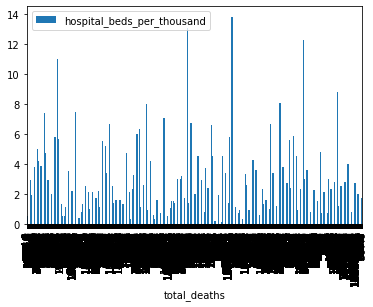

In [9]:
second.plot.bar(x='total_deaths', y='hospital_beds_per_thousand')